In [27]:
# After examining the plots it is clear to see that the temperature does increase the closer you get to the equator.
## my last graph looks like a world map!

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform


# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

api_key = "d6810bdaefe467cd40907ae8b7ed7c10"

## Generate Cities List

In [2]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      677
City       677
Country    677
dtype: int64

In [9]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\raman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\raman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\raman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\raman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\raman\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

------------------------
Proceesing: City #  1  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=kapaa
------------------------
Proceesing: City #  2  |  Sistranda NO
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=sistranda
------------------------
Proceesing: City #  3  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=new+norfolk
------------------------
Proceesing: City #  4  |  Katwijk NL
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=katwijk
------------------------
Proceesing: City #  5  |  Makakilo City US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=makakilo+city
------------------------
Proceesing: City #  6  |  Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=d

------------------------
Proceesing: City #  47  |  Caxito BR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=caxito
------------------------
Proceesing: City #  48  |  Sangin AF
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=sangin
------------------------
Proceesing: City #  49  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=butaritari
------------------------
Proceesing: City #  50  |  Aklavik CA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=aklavik
------------------------
Proceesing: City #  51  |  Vilhena BR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=vilhena
------------------------
Proceesing: City #  52  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe

------------------------
Proceesing: City #  93  |  Manokwari ID
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=manokwari
------------------------
Proceesing: City #  94  |  Areia Branca BR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=areia+branca
------------------------
Proceesing: City #  95  |  Chokurdakh RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=chokurdakh
------------------------
Proceesing: City #  96  |  Kon Tum VN
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=kon+tum
------------------------
Proceesing: City #  97  |  Chuy UY
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=chuy
------------------------
Proceesing: City #  98  |  Urgut UZ
http://api.openweathermap.org/data/2.5/weather?appid=d6

------------------------
Proceesing: City #  139  |  Solnechnyy RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=solnechnyy
------------------------
Proceesing: City #  140  |  Ambovombe MG
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=ambovombe
------------------------
Proceesing: City #  141  |  East Stroudsburg US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=east+stroudsburg
------------------------
Proceesing: City #  142  |  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=provideniya
------------------------
Proceesing: City #  143  |  Altamira BR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=altamira
------------------------
Proceesing: City #  144  |  Mahebourg MU
http://api.openweathe

------------------------
Proceesing: City #  184  |  Charters Towers AU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=charters+towers
------------------------
Proceesing: City #  185  |  Smidovich RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=smidovich
City not found, skipping...
------------------------
Proceesing: City #  186  |  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=cherskiy
------------------------
Proceesing: City #  187  |  Wicklow IE
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=wicklow
------------------------
Proceesing: City #  188  |  Ust-Maya RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=ust-maya
------------------------
Proceesing: City #  189  |  Takoradi GH
http://a

------------------------
Proceesing: City #  229  |  Norman Wells CA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=norman+wells
------------------------
Proceesing: City #  230  |  Kahului US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=kahului
------------------------
Proceesing: City #  231  |  Bobcaygeon CA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=bobcaygeon
------------------------
Proceesing: City #  232  |  Illapel CL
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=illapel
------------------------
Proceesing: City #  233  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=nikolskoye
------------------------
Proceesing: City #  234  |  Sarangani PH
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  275  |  Severnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=severnoye
------------------------
Proceesing: City #  276  |  Ngorongoro TZ
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=ngorongoro
------------------------
Proceesing: City #  277  |  Ati TD
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=ati
City not found, skipping...
------------------------
Proceesing: City #  278  |  Andijan UZ
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=andijon
------------------------
Proceesing: City #  279  |  Khandbari NP
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=khandbari
------------------------
Proceesing: City #  280  |  Vila Franca do Campo PT
http://api.ope

------------------------
Proceesing: City #  321  |  Kalmunai LK
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=kalmunai
------------------------
Proceesing: City #  322  |  Namibe AO
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=namibe
------------------------
Proceesing: City #  323  |  Port Lincoln AU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=port+lincoln
------------------------
Proceesing: City #  324  |  Quelimane MZ
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=quelimane
------------------------
Proceesing: City #  325  |  Bafata GW
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=bafata
------------------------
Proceesing: City #  326  |  Ewa Beach US
http://api.openweathermap.org/data/2.5/weather?

------------------------
Proceesing: City #  367  |  Kouango CF
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=kouango
------------------------
Proceesing: City #  368  |  Grand-Santi GF
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=grand-santi
------------------------
Proceesing: City #  369  |  Saint-Augustin FR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=saint-augustin
------------------------
Proceesing: City #  370  |  Macau BR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=macau
------------------------
Proceesing: City #  371  |  Irtyshskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=irtyshskiy
------------------------
Proceesing: City #  372  |  Varberg SE
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  412  |  Mount Isa AU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=mount+isa
------------------------
Proceesing: City #  413  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=clyde+river
------------------------
Proceesing: City #  414  |  San Cristobal EC
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=san+cristobal
------------------------
Proceesing: City #  415  |  Hereford GB
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=hereford
------------------------
Proceesing: City #  416  |  Havoysund NO
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=havoysund
------------------------
Proceesing: City #  417  |  Inuvik CA
http://api.openweathermap.org/da

------------------------
Proceesing: City #  458  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  459  |  Lavumisa ZA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=lavumisa
City not found, skipping...
------------------------
Proceesing: City #  460  |  Carballo ES
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=carballo
------------------------
Proceesing: City #  461  |  Sedona US
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=sedona
------------------------
Proceesing: City #  462  |  Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=leningradskiy
------------------------
Proceesing: City #  463  |  Neiva CO
http://api.openweatherm

------------------------
Proceesing: City #  504  |  Vryburg ZA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=vryburg
------------------------
Proceesing: City #  505  |  Tahoua NE
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=tahoua
------------------------
Proceesing: City #  506  |  Great Yarmouth GB
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=great+yarmouth
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  507  |  San Juan Evangelista MX
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=san+juan+evangelista
------------------------
Proceesing: City #  508  |  Mareeba AU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=mareeba
City not found, skipping...
---

------------------------
Proceesing: City #  549  |  Paris FR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=paris
------------------------
Proceesing: City #  550  |  Manado ID
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=manado
------------------------
Proceesing: City #  551  |  Ziro IN
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=ziro
------------------------
Proceesing: City #  552  |  Mutoko ZW
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=mutoko
------------------------
Proceesing: City #  553  |  Talara PE
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=talara
------------------------
Proceesing: City #  554  |  Requena ES
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8

------------------------
Proceesing: City #  595  |  Boromlya UA
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=boromlya
------------------------
Proceesing: City #  596  |  Upata VE
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=upata
------------------------
Proceesing: City #  597  |  Saint-Pierre FR
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=saint-pierre
------------------------
Proceesing: City #  598  |  Polyarnyy RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=polyarnyy
------------------------
Proceesing: City #  599  |  Zelenoborsk RU
http://api.openweathermap.org/data/2.5/weather?appid=d6810bdaefe467cd40907ae8b7ed7c10&units=IMPERIAL&q=zelenoborsk
------------------------
Proceesing: City #  600  |  Gombong ID
http://api.openweathermap.org/data/2.5/we

## Perform API Calls

In [10]:

clean_cities_df.count()

City                600
Country             600
Temperature (F)     600
Latitude            600
Longitude           600
Humidity (%)        600
Cloudiness (%)      600
Wind Speed (mph)    600
dtype: int64

In [11]:
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kapaa,US,82.2,22.08,-159.32,74,40,18.34
1,Sistranda,NO,44.6,63.73,8.83,100,40,6.93
2,New Norfolk,AU,53.6,-42.78,147.06,71,75,4.7
3,Katwijk,NL,53.87,52.2,4.41,100,80,6.29
4,Makakilo City,US,80.42,21.35,-158.09,54,1,9.17
5,Castro,CL,28.11,-42.48,-73.76,100,0,3.38
6,Port Alfred,ZA,65.01,-33.59,26.89,90,56,9.31
7,Saint George,GR,68,39.45,22.34,68,20,6.93
8,Victor Harbor,AU,57.2,-35.55,138.62,76,20,11.41
9,Matara,PE,27.57,-13.74,-72.9,82,0,1.92


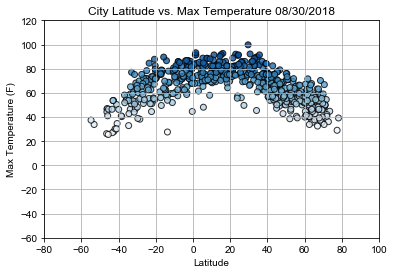

In [13]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Blues', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

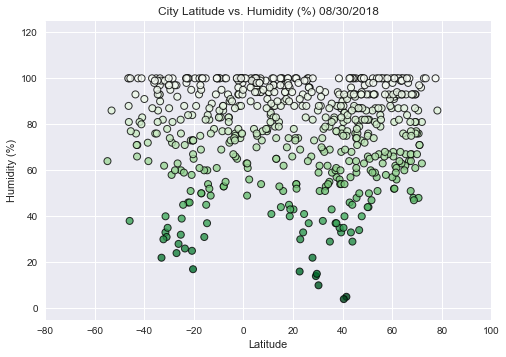

In [15]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Greens_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

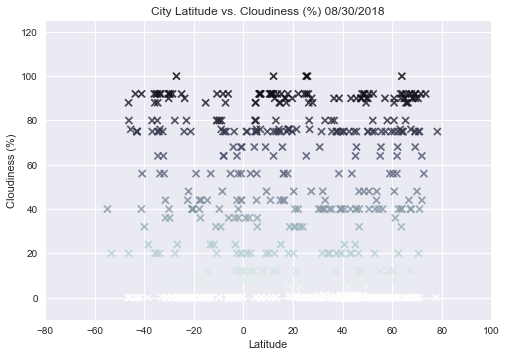

In [25]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="reds", linewidths=1, marker="x", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

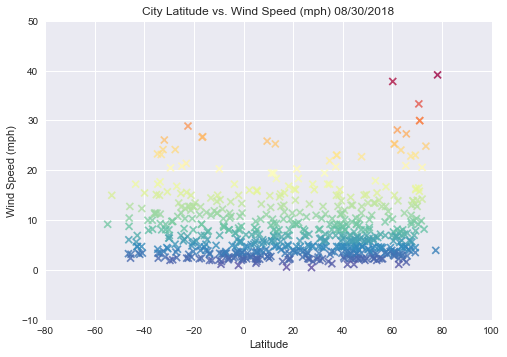

In [23]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="ocean", linewidths=1, marker="x", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()

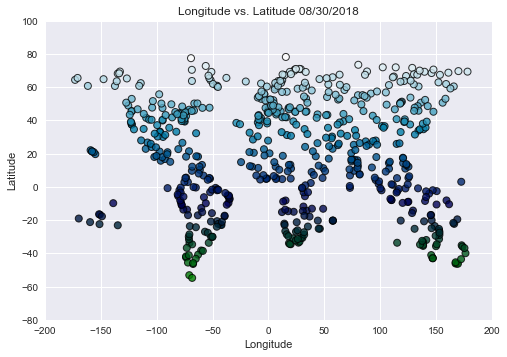

In [21]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='ocean', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("Latitude_Longitude.png")

# Show plot
plt.show()